In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from urllib.request import urlopen
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from datetime import datetime
import time 
import re

In [2]:
driver = webdriver.Chrome('C:/Users/user/Downloads/chromedriver_win32/chromedriver')
driver.implicitly_wait(3)

In [3]:
url='https://imnews.imbc.com/more/search/?mainSearch=%EA%B2%BD%EC%A0%9C#page=0'
driver.get(url)

In [28]:
last_page_height = driver.execute_script("return document.documentElement.scrollHeight")
while True: 
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(3.0)
    new_page_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_page_height == last_page_height:
        break
    last_page_height = new_page_height

In [29]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [33]:
soup

<html class="mobile" lang="ko"><head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0,user-scalable=no" name="viewport"/>
<meta content="MBC NEWS" name="title"/>
<meta content="http://imnews.imbc.com/" name="url"/>
<meta content="기본과 원칙에 충실한 뉴스" name="description"/>
<meta content="http://imnews.imbc.com/" property="og:url"/>
<meta content="MBC NEWS" property="og:title"/>
<meta content="기본과 원칙에 충실한 뉴스" property="og:description"/>
<meta content="MBC NEWS" property="og:site_name"/>
<meta content="http://img.imnews.imbc.com/images/2015/MBCNEWS_logo.png" property="og:image"/>
<meta content="https://www.facebook.com/MBCnews" property="article:publisher"/>
<meta content="ko_KR" property="og:locale"/>
<meta content="692275414241491" property="fb:app_id"/>
<meta content="@mbcnews" name="twitter:site"/>
<meta content="MBC NEWS" itemprop="name"/>
<meta content="기본과 원칙에 충실한 뉴스" it

In [63]:
temp=soup.select('div#container > div')

In [74]:
ss=soup.findAll('span', {'class':'tit ellipsis2'})

In [4]:

def crawling():
    title=[]
    for page in range(1,90):#페이지 돌면서 크롤링
        driver = webdriver.Chrome('C:/Users/user/Downloads/chromedriver_win32/chromedriver')
        driver.implicitly_wait(1)
        url='https://imnews.imbc.com/more/search/?mainSearch=%EA%B2%BD%EC%A0%9C#page='+str(page)
        driver.get(url)
        last_page_height = driver.execute_script("return document.documentElement.scrollHeight")
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        time.sleep(1.0)
        new_page_height = driver.execute_script("return document.documentElement.scrollHeight")
        
        last_page_height = new_page_height
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        ss=soup.findAll('span', {'class':'tit ellipsis2'})
        for s in range(0,len(ss)):
            title.append(ss[s].text)
    return title
temp=crawling()

In [5]:
print(temp)

['산후조리원·유치원 정보 한눈에…열린소비자포털로 통합', '코스피·코스닥 모두 1% 가까이 상승', '카드업계, 수해 고객에 대금 청구유예 등 금융지원', '폭우로 가축 30만마리 폐사하고 농작물 6천㏊ 침수', '공공재건축 사례 발굴 착수…과열 개발예정지 기획조사', '김현미 "전월세전환율 4.0% 너무 높아…개정할 것"', '법원, 옵티머스 김재현 대표에 6894억원 추징보전 명령', '코스피·코스닥 강보합권 거래…개인 사자세', '국토부 1차관 "공공재건축 서울시와 이견 없어"', '외국인 아파트 취득 늘자…여당 "실거주 않으면 중과세" 입법 추진', '정부 "9억 이상 고가주택 매매 자금출처 의심거래 상시조사"', '[스마트리빙] 여름철 양파, 망에 담아 놓으면 금방 상해요', '[스마트리빙] 장마철 반려견 사료 어떻게 보관할까?', '새 단장 끝낸 모란시장…특화거리 재도약', '국제 금값, 사상 첫 온스당 2천 달러 돌파', '"휴가 가려 샀더니"…캠핑 용품, 유해물질 검출', '공급 충분하다더니…투기 자극 우려 없나?', '국제금값, 사상 첫 온스당 2천달러 돌파', '[이 시각 세계] 필리핀 코로나19 급증세…마닐라 등 준봉쇄령', '[뉴스 열어보기] "커피숍 입장부터 주문까지 마스크 착용"...커피숍 방역수칙 강화', '"50층 줄게 50% 다오"…시장 반응은 \'글쎄\'', "수도권 '13만 호' 공급…50층 재건축도 허용", '일본제철 \'자산압류\' 오늘부터…"강제 매각 시 보복"', '홍콩 무역금융 사모펀드 610억 환매, 내년 5월까지 연기', "'월세 전환' 커지는 우려…'전월세 전환율' 낮아질까?", "TV조선 '방정오 3백 억 몰아주기?'…공정위 조사", '공급 충분하다더니…투기심리 자극 우려 없나?', '"50층 줄게 50% 다오"…강남 재건축 시장 "글쎄"', "공공지·유휴지 긁어 모아…수도권 '13만 호'", '정부 "공공재건축 최대 50층 허용, 정부-서울시 이견 없다"', '금통위원들 "완화적 통화정책 따른 자산 버블 우

In [4]:
from konlpy.tag import Mecab
mecab = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")
import pandas as pd

In [7]:
df= pd.DataFrame(temp)
df.to_csv('newTitle.csv',encoding='utf-8-sig')
#파일 저장

In [ ]:
df=pd.read_csv('newTitle.csv')
#파일 불러오기

In [19]:
df=df.drop("Unnamed: 0", axis=1)

In [23]:
df.get('0')

0               산후조리원·유치원 정보 한눈에…열린소비자포털로 통합
1                       코스피·코스닥 모두 1% 가까이 상승
2                카드업계, 수해 고객에 대금 청구유예 등 금융지원
3               폭우로 가축 30만마리 폐사하고 농작물 6천㏊ 침수
4               공공재건축 사례 발굴 착수…과열 개발예정지 기획조사
                       ...                  
440       中 기록적 홍수로 수재민 4천500만명…재산피해 20조원 육박
441             강남권 토지거래허가제 한 달…주택 거래 93% 급감
442              세입자 없는 집 임대등록 때 임대료 상한 명시해야
443         7·10대책 이후 서울 아파트값 상승폭 둔화…전세난은 심화
444    경실련 "판교 개발이익 8조원"…"공공사업자가 국민 상대로 땅장사"
Name: 0, Length: 445, dtype: object

In [75]:
sentences=df.values
#데이터만 추출 나중에 사용

{'코로나': 26, '주택': 21, '코스피': 19, '상승': 19, '아파트': 18, '공급': 18, '서울': 18, '경제': 18, '부동산': 16, '수도': 15, '스마트': 14, '최대': 14, '외국인': 13, '정부': 13, '층': 13, '투자': 13, '집': 13, '리빙': 12, '뉴스': 12, '법': 12, '개월': 12, '최고': 12, '분기': 12, '시행': 12, '증가': 11, '상반기': 11, '조사': 10, '시장': 10, '발표': 10, '대책': 10, '하락': 10, '금융': 9, '김현미': 9, '금값': 9, '사상': 9, '일': 9, '감소': 9, '주': 9, '뉴스터치': 9, '피해': 9, '집값': 9, '대출': 9, '통합': 8, '전월세': 8, '전환': 8, '돌파': 8, '우려': 8, '호': 8, '오늘': 8, '공공': 8, '기업': 8, '검토': 8, '임대': 8, '증시': 8, '배': 8, '국내': 8, '위': 8, '지원': 7, '것': 7, '거래': 7, '개인': 7, '허용': 7, '펀드': 7, '마감': 7, '이슈': 7, '완전': 7, '정복': 7, '인수': 7, '민주': 7, '통과': 7, '역대': 7, '트럼프': 7, '달': 7, '네이버': 7, '美': 7, '개': 7, '올해': 7, '검찰': 7, '수사': 7, '성장률': 7, '연속': 7, '수': 7, '합의': 7, '택지': 7, '소비자': 6, '국제': 6, '세계': 6, '매각': 6, '정책': 6, '경기': 6, '가능': 6, '전세': 6, '폭': 6, '경실련': 6, '갭': 6, '대통령': 6, '반발': 6, '작년': 6, '수출': 6, '계약': 6}


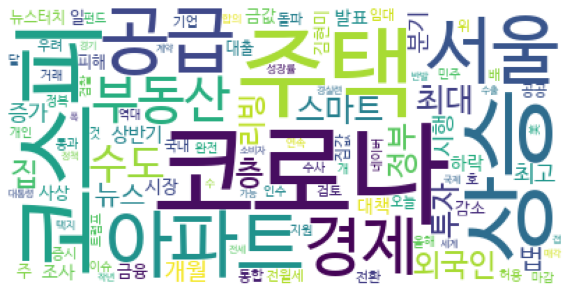

In [149]:
galexy_posts = df.get('0')


galexy_stop_words = r"외 등 만 명 원 천 억 년 월 대 중 조 . ' 3"
galexy_stop_words = galexy_stop_words.split(' ')
galexy_stop_words[0:10]

# 불용어 제거
galexy_nouns = []
for post in galexy_posts:
    for noun in mecab.nouns(post): #문장을 명사로 바꾼다.
        if noun not in galexy_stop_words: #filter로 필요없는 명사만 걸러낸다.
            galexy_nouns.append(noun)

galexy_nouns[0:10]

from collections import Counter
num_top_nouns = 100
galexy_nouns_counter = Counter(galexy_nouns)
galexy_top_nouns = dict(galexy_nouns_counter.most_common(num_top_nouns))
print(galexy_top_nouns)

from wordcloud import WordCloud
galexy_wc = WordCloud(background_color="white", font_path='./Downloads/nlp_class_day2-master/nlp_class_day2-master/font/NanumBarunGothic.ttf')
galexy_wc.generate_from_frequencies(galexy_top_nouns)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(galexy_wc)

In [150]:
temp=df.values

In [151]:
tokens=""
for s in temp:
    tokens+=s+" "
print(tokens)

['산후조리원·유치원 정보 한눈에…열린소비자포털로 통합 코스피·코스닥 모두 1% 가까이 상승 카드업계, 수해 고객에 대금 청구유예 등 금융지원 폭우로 가축 30만마리 폐사하고 농작물 6천㏊ 침수 공공재건축 사례 발굴 착수…과열 개발예정지 기획조사 김현미 "전월세전환율 4.0% 너무 높아…개정할 것" 법원, 옵티머스 김재현 대표에 6894억원 추징보전 명령 코스피·코스닥 강보합권 거래…개인 사자세 국토부 1차관 "공공재건축 서울시와 이견 없어" 외국인 아파트 취득 늘자…여당 "실거주 않으면 중과세" 입법 추진 정부 "9억 이상 고가주택 매매 자금출처 의심거래 상시조사" [스마트리빙] 여름철 양파, 망에 담아 놓으면 금방 상해요 [스마트리빙] 장마철 반려견 사료 어떻게 보관할까? 새 단장 끝낸 모란시장…특화거리 재도약 국제 금값, 사상 첫 온스당 2천 달러 돌파 "휴가 가려 샀더니"…캠핑 용품, 유해물질 검출 공급 충분하다더니…투기 자극 우려 없나? 국제금값, 사상 첫 온스당 2천달러 돌파 [이 시각 세계] 필리핀 코로나19 급증세…마닐라 등 준봉쇄령 [뉴스 열어보기] "커피숍 입장부터 주문까지 마스크 착용"...커피숍 방역수칙 강화 "50층 줄게 50% 다오"…시장 반응은 \'글쎄\' 수도권 \'13만 호\' 공급…50층 재건축도 허용 일본제철 \'자산압류\' 오늘부터…"강제 매각 시 보복" 홍콩 무역금융 사모펀드 610억 환매, 내년 5월까지 연기 \'월세 전환\' 커지는 우려…\'전월세 전환율\' 낮아질까? TV조선 \'방정오 3백 억 몰아주기?\'…공정위 조사 공급 충분하다더니…투기심리 자극 우려 없나? "50층 줄게 50% 다오"…강남 재건축 시장 "글쎄" 공공지·유휴지 긁어 모아…수도권 \'13만 호\' 정부 "공공재건축 최대 50층 허용, 정부-서울시 이견 없다" 금통위원들 "완화적 통화정책 따른 자산 버블 우려" 경기 회복 기대감에 코스피 오름세…양 시장 상승 마감 공공 재건축 50층 허용…수도권 13만 호 공급 서울시 "공공재건축 방안에 찬성 안 

In [152]:
from konlpy.tag import Okt
tokenizer = Okt()  
tokens = tokenizer.morphs(tokens[0])
#전체 단어에 대한 말뭉치를 만들기 위해 리스트를 돌며 합친다.

In [153]:
# 토큰을 문자열로 변환
sentence = " ".join(tokens)

# CountVectorizer의 입력에 맞게 배열로 변경
sentences = []
sentences.append(sentence)

from sklearn.feature_extraction.text import CountVectorizer


# 1글자도 인식이 되도록 토큰 패턴 변경
cv = CountVectorizer(token_pattern = r"(?u)\b\w+\b")
cv.fit(sentences)

def convert_cv(sentence, cv):
    
    # 문장을 토큰으로 분리
    tokenizer = Okt()
    tokens = tokenizer.morphs(sentence)
    
    # 토큰을 문자열로 변환
    sentence = " ".join(tokens)
    
    # CountVectorizer의 입력에 맞게 배열로 변경
    sentences = []
    sentences.append(sentence)
    
    # 벡터 변환
    vector = cv.transform(sentences).toarray()    
    
    return vector


In [188]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
from konlpy.tag import Okt
tokenizer = Okt()  
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))
bigNum=0
temp_string=""
pos=[]
strings=[]
def comParedTo(sbsString):
    bigNum=0
    for post in galexy_posts:
        temp_num=cos_sim(convert_cv(sbsString,cv)[0],convert_cv(post,cv)[0])
        if(temp_num>bigNum):
            bigNum=temp_num
            temp_string=post
    print(temp_string)
    print(bigNum)
ass='상승'
comParedTo(ass)

코스피·코스닥 모두 1% 가까이 상승
0.4082482904638631


In [ ]:
ass='상승'
comParedTo(ass)

In [155]:
#언론사 데이터를 크롤링해서 좋다, 실망, 대박 등의 단어가 존재하지 않습니다.
#Bow의 특성상 없는 단어만으로는 계산이 불가능하여 상승, 하락 같은 단어로 바꾸었습니다.

In [156]:
temp.tolist()

[['산후조리원·유치원 정보 한눈에…열린소비자포털로 통합'],
 ['코스피·코스닥 모두 1% 가까이 상승'],
 ['카드업계, 수해 고객에 대금 청구유예 등 금융지원'],
 ['폭우로 가축 30만마리 폐사하고 농작물 6천㏊ 침수'],
 ['공공재건축 사례 발굴 착수…과열 개발예정지 기획조사'],
 ['김현미 "전월세전환율 4.0% 너무 높아…개정할 것"'],
 ['법원, 옵티머스 김재현 대표에 6894억원 추징보전 명령'],
 ['코스피·코스닥 강보합권 거래…개인 사자세'],
 ['국토부 1차관 "공공재건축 서울시와 이견 없어"'],
 ['외국인 아파트 취득 늘자…여당 "실거주 않으면 중과세" 입법 추진'],
 ['정부 "9억 이상 고가주택 매매 자금출처 의심거래 상시조사"'],
 ['[스마트리빙] 여름철 양파, 망에 담아 놓으면 금방 상해요'],
 ['[스마트리빙] 장마철 반려견 사료 어떻게 보관할까?'],
 ['새 단장 끝낸 모란시장…특화거리 재도약'],
 ['국제 금값, 사상 첫 온스당 2천 달러 돌파'],
 ['"휴가 가려 샀더니"…캠핑 용품, 유해물질 검출'],
 ['공급 충분하다더니…투기 자극 우려 없나?'],
 ['국제금값, 사상 첫 온스당 2천달러 돌파'],
 ['[이 시각 세계] 필리핀 코로나19 급증세…마닐라 등 준봉쇄령'],
 ['[뉴스 열어보기] "커피숍 입장부터 주문까지 마스크 착용"...커피숍 방역수칙 강화'],
 ['"50층 줄게 50% 다오"…시장 반응은 \'글쎄\''],
 ["수도권 '13만 호' 공급…50층 재건축도 허용"],
 ['일본제철 \'자산압류\' 오늘부터…"강제 매각 시 보복"'],
 ['홍콩 무역금융 사모펀드 610억 환매, 내년 5월까지 연기'],
 ["'월세 전환' 커지는 우려…'전월세 전환율' 낮아질까?"],
 ["TV조선 '방정오 3백 억 몰아주기?'…공정위 조사"],
 ['공급 충분하다더니…투기심리 자극 우려 없나?'],
 ['"50층 줄게 50% 다오"…강남 재건축 시장 "글쎄"'],
 ["공공지·유휴지 

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(token_pattern = r"(?u)\b\w+\b")

tf_idf.fit(tokens)

print(tf_idf.vocabulary_)


{'산후조리원': 996, '유치원': 1402, '정보': 1593, '한눈': 1930, '에': 1277, '열린': 1310, '소비자': 1080, '포털': 1885, '로': 679, '통합': 1840, '코스피': 1806, '코스닥': 1805, '모두': 746, '1': 2, '가까이': 194, '상승': 1008, '카드': 1794, '업계': 1263, '수해': 1120, '고객': 307, '대금': 588, '청구': 1745, '유예': 1396, '등': 652, '금융': 425, '지원': 1684, '폭우': 1891, '가축': 208, '30만': 63, '마리': 695, '폐': 1878, '사하고': 988, '농작물': 536, '6천': 117, '침수': 1793, '공공': 326, '재건축': 1541, '사례': 972, '발굴': 828, '착수': 1716, '과열': 348, '개발': 234, '예정': 1322, '지': 1679, '기획': 461, '조사': 1626, '김현미': 469, '전월세': 1572, '전환율': 1581, '4': 78, '0': 0, '너무': 513, '높아': 537, '개정': 244, '할': 1937, '것': 267, '법원': 871, '옵티머스': 1341, '김재현': 464, '대표': 603, '6894억원': 115, '추징': 1771, '보전': 890, '명령': 742, '강': 220, '보합': 892, '권': 391, '거래': 251, '개인': 242, '사': 962, '자세': 1520, '국토부': 386, '차관': 1712, '서울시': 1031, '와': 1343, '이견': 1440, '없어': 1271, '외국인': 1352, '아파트': 1219, '취득': 1784, '늘자': 554, '여당': 1288, '실': 1179, '거주': 256, '않으면': 1236, '중과세': 1665, '입법

In [158]:
len(galexy_posts)

445

In [159]:
print(pd.DataFrame(tf_idf.transform(galexy_posts).toarray()).shape)

(445, 2033)


In [160]:

tf_idf_matrix = tf_idf.fit_transform(galexy_posts)

In [161]:
print(tf_idf_matrix.shape)

(445, 2139)


In [252]:
from sklearn.metrics.pairwise import linear_kernel

# 10000 x 10000을 서로 내적하여 코사인 유사도를 구함
# 각 항목은 두 영화의 유사도를 나타냄
cosine_sim = linear_kernel(tf_idf_matrix, tf_idf_matrix)

# print(cosine_sim.shape)
# list(enumerate(cosine_sim[0]))

In [163]:

indices = pd.Series(data=df['0'],name="title").drop_duplicates()
indices = pd.DataFrame(indices)

In [164]:
indices

,title
0,산후조리원·유치원 정보 한눈에…열린소비자포털로 통합
1,코스피·코스닥 모두 1% 가까이 상승
2,"카드업계, 수해 고객에 대금 청구유예 등 금융지원"
3,폭우로 가축 30만마리 폐사하고 농작물 6천㏊ 침수
4,공공재건축 사례 발굴 착수…과열 개발예정지 기획조사
...,...
440,中 기록적 홍수로 수재민 4천500만명…재산피해 20조원 육박
441,강남권 토지거래허가제 한 달…주택 거래 93% 급감
442,세입자 없는 집 임대등록 때 임대료 상한 명시해야
443,7·10대책 이후 서울 아파트값 상승폭 둔화…전세난은 심화


In [166]:
# 유사한 제목를 구함
def get_similar(title, indices, cosine_sim):

    # 제목의 인덱스를 구함
    try:
        index = indices[indices['title']==title].index[0]
    except:
        return None
    
    # 해당 영화의 유사도를 배열로 변환
    # 0 : 인덱스, 1 : 유사도
    scores = list(enumerate(cosine_sim[index]))

    # 유사도(x[1] 항목)를 기준으로 높은 순으로 정렬
    scores = sorted(scores, key=lambda x: x[1], reverse=True)

    # 가장 유사도가 높은 자신을 제외하고 5개를 추출
    scores = scores[1:6]
    #print(scores)
    # 인덱스를 구함
    index = [x[0] for x in scores]
    #print(index)
    #print(type(index))
    # 각 인덱스의 영화 제목을 구함
    print(indices.loc[index])

# 분석

### Bow를 사용하여 관련 단어와 가장 유사한 제목 5개 보여주기

### 언론사 제목을 크롤링하였습니다.
### 좋다, 실망, 대박 과 같은 단어는 말뭉치에 없어 분석에 실패하였습니다.
### 감정분석에 사용될 단어 상승, 최고, 하락, 돌파, 유해를 분석하였습니다.

In [257]:
def comParedTo2(sbsString):
    pos=[]
    strings=[]
    index={}
    for post in galexy_posts:
        cal = cos_sim(convert_cv(sbsString,cv)[0],convert_cv(post,cv)[0])
        if cal not in pos:
            pos.append(cal)
            strings.append(post)
            index[pos[len(strings)-1]]=len(strings)-1
        
    pos.sort(reverse=True)
    for i in range(0,5):
        if(len(strings))>i:
            print(i+1,"번제목:",strings[index[pos[i]]],"         확률: ",pos[i])


In [256]:
#BoW를 사용해서 관련 단어와 가장 유사한 제목 5개 보여주기
comParedTo2('상승')
print('====================================================================================================')
comParedTo2('최고')
print('====================================================================================================')
comParedTo2('하락')
print('====================================================================================================')
comParedTo2('돌파')
print('====================================================================================================')
comParedTo2('유해')

1 번제목: 코스피·코스닥 모두 1% 가까이 상승          확률:  0.4082482904638631
2 번제목: 개인·외국인 매수세…코스피·코스닥 상승 흐름, 셀트리온↓          확률:  0.35355339059327373
3 번제목: 서울 아파트 전셋값 7개월만에 최대 상승          확률:  0.3333333333333333
4 번제목: 코스피, 개인 매수에 소폭 상승…코스닥은 급등          확률:  0.31622776601683794
5 번제목: 경기 회복 기대감에 코스피 오름세…양 시장 상승 마감          확률:  0.30151134457776363
1 번제목: '논문 조작·성범죄' 저질러도…'대한민국 최고 과학자?'          확률:  0.3779644730092272
2 번제목: 올해 상반기 담배 17억갑 팔려…2016년 이후 최고          확률:  0.3333333333333333
3 번제목: 모바일 게임 상반기 매출 2조 8천억원 돌파…역대 최고 기록          확률:  0.31622776601683794
4 번제목: 국제금값, 이틀만에 다시 최고가 경신…7월 10.3%↑          확률:  0.30151134457776363
5 번제목: 금 1g당 7만 6천원대…장중 최고가 경신          확률:  0.2886751345948129
1 번제목: 코스피, 하락세 전환…아모레퍼시픽 3% 넘게 하락          확률:  0.6324555320336759
2 번제목: 국내 증시 하락세 출발…기관 팔자세          확률:  0.35355339059327373
3 번제목: 이해찬 2분기 성장률 하락에 "그나마 선방"          확률:  0.3333333333333333
4 번제목: 휘발윳값 두 달 만에 하락전환…리터당 1361원          확률:  0.31622776601683794
5 번제목: 코스피, 선물 시장서 큰 매도 규모 보이며 소폭 하락          확률: 

# Tf-idf

### 위의 bow를 사용해서 찾은 문장과 가장 유사한 문장 5개 보여주기

In [192]:
#Tf-idf 로 가장 유사한 문장 추출
get_similar("코스피·코스닥 모두 1% 가까이 상승", indices, cosine_sim)

                               title
379      美·中 갈등 고조에 코스피·코스닥 모두 하락 마감
227  개인·외국인 매수세…코스피·코스닥 상승 흐름, 셀트리온↓
378        금값 사흘 연속 최고가 행진…2% 가까이 상승
7             코스피·코스닥 강보합권 거래…개인 사자세
41        코스피, 1% 넘는 상승세…제일약품 상한가 기록


In [193]:
get_similar("'논문 조작·성범죄' 저질러도…'대한민국 최고 과학자?'", indices, cosine_sim)#정확한 제목을 입력해야 한다.

                                 title
131      올해 상반기 담배 17억갑 팔려…2016년 이후 최고
89   모바일 게임 상반기 매출 2조 8천억원 돌파…역대 최고 기록
362   작년 집값 시총 5천조원 돌파…GDP 대비 집값 사상 최고
0         산후조리원·유치원 정보 한눈에…열린소비자포털로 통합
1                 코스피·코스닥 모두 1% 가까이 상승


In [195]:
get_similar("국제금값, 사상 첫 온스당 2천달러 돌파", indices, cosine_sim)

                                title
14           국제 금값, 사상 첫 온스당 2천 달러 돌파
132    은행 예금금리 사상 첫 0%대…가계대출금리도 사상 최저
356         작년 주택 시가총액 사상 처음 5천조 원 돌파
362  작년 집값 시총 5천조원 돌파…GDP 대비 집값 사상 최고
118    국제금값, 이틀만에 다시 최고가 경신…7월 10.3%↑


In [198]:
get_similar("\"휴가 가려 샀더니\"…캠핑 용품, 유해물질 검출", indices, cosine_sim)

                                                title
34                        캠핑 의자·피크닉 매트서 기준 넘는 유해물질 검출
68  [정참시] 윤희숙 이어 윤준병 "나도 월세"에 시끌 / 또, 취소… 휴가 가기 어려...
0                        산후조리원·유치원 정보 한눈에…열린소비자포털로 통합
1                                코스피·코스닥 모두 1% 가까이 상승
2                         카드업계, 수해 고객에 대금 청구유예 등 금융지원


In [178]:
temp_list=[]
for sen in temp:
    for se in sen:
        temp_list.append(tokenizer.nouns(se))

In [180]:
import gensim.models

model = gensim.models.Word2Vec(sentences=temp_list,size=300,window=2,min_count=1)

In [181]:
word_vector=model.wv

# Word2vec

### 주식, 상승, 하락 단어와 가장 유사한 단어 추출하기


In [184]:
print(model.wv.most_similar(positive=['주식'], topn=5))

[('조사', 0.16989000141620636), ('금리인하', 0.16782328486442566), ('분기', 0.1427488625049591), ('보합', 0.141959547996521), ('률', 0.13737763464450836)]


In [185]:
print(model.wv.most_similar(positive=['상승'], topn=5))

[('스마트리빙', 0.19459408521652222), ('점수', 0.1862713098526001), ('초', 0.1806146204471588), ('전체', 0.1749720573425293), ('해', 0.16887956857681274)]


In [186]:
print(model.wv.most_similar(positive=['하락'], topn=5))

[('여름', 0.2275443971157074), ('제철', 0.197148397564888), ('휴대폰', 0.1825919896364212), ('혁신', 0.17703977227210999), ('로드', 0.1738085299730301)]
